<a href="https://colab.research.google.com/github/siddartha1192/edurekaCourses/blob/main/Dimensionality_Reduction_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cancer.csv')
print(df.head())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


In [ ]:
print(df.shape)

(569, 33)


In [ ]:
#Missing Value Ratio
df.isnull().sum()/len(df)*100

,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

<Axes: >

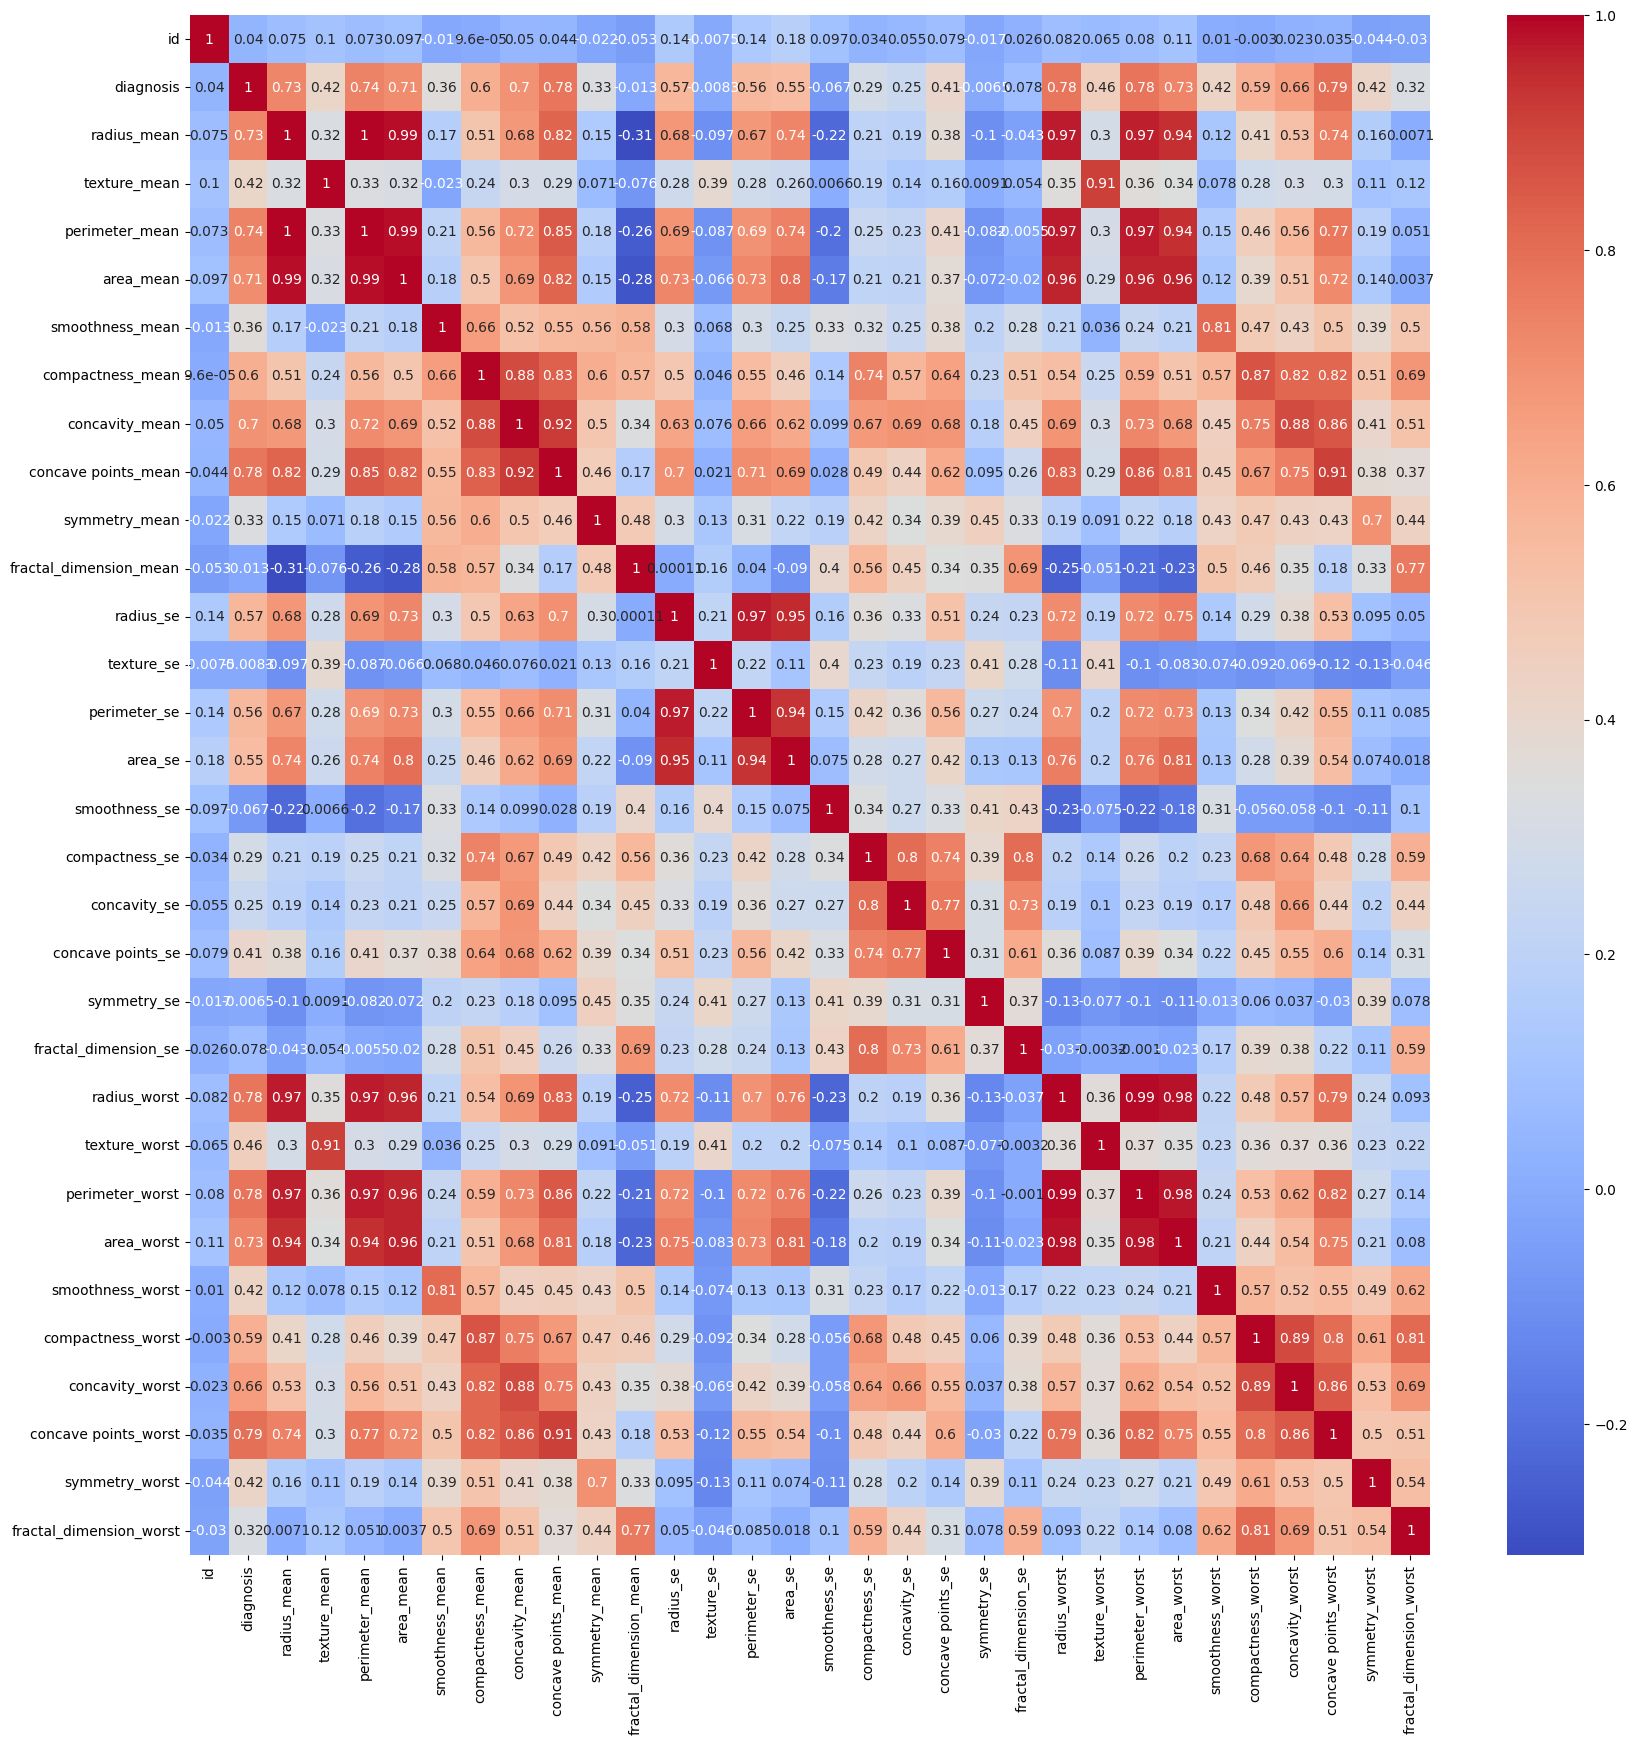

In [ ]:
#High Correlation Filter
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
x_cor=df.corr()>0.95
print(x_cor)

                            id  ...  fractal_dimension_worst
id                        True  ...                    False
diagnosis                False  ...                    False
radius_mean              False  ...                    False
texture_mean             False  ...                    False
perimeter_mean           False  ...                    False
area_mean                False  ...                    False
smoothness_mean          False  ...                    False
compactness_mean         False  ...                    False
concavity_mean           False  ...                    False
concave points_mean      False  ...                    False
symmetry_mean            False  ...                    False
fractal_dimension_mean   False  ...                    False
radius_se                False  ...                    False
texture_se               False  ...                    False
perimeter_se             False  ...                    False
area_se                 

In [ ]:
x_cor['radius_mean']

,radius_mean
id,False
diagnosis,False
radius_mean,True
texture_mean,False
perimeter_mean,True
area_mean,True
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
df.drop(['perimeter_mean','area_mean','radius_worst','perimeter_worst'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('diagnosis',axis=1),df['diagnosis'],test_size=0.3)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.00560923, 0.07849232, 0.01839418, 0.00541157, 0.01738796,
       0.09404963, 0.1182929 , 0.00519037, 0.00631254, 0.03334019,
       0.00562442, 0.03562449, 0.06489962, 0.00513311, 0.00992423,
       0.00668239, 0.00634259, 0.00614365, 0.00738965, 0.02750723,
       0.22994956, 0.0087353 , 0.01817351, 0.05860715, 0.10303892,
       0.01633654, 0.00740675])

In [ ]:
rf_imp=pd.DataFrame({'feature':x_train.columns,'importance':rf.feature_importances_})
rf_imp.sort_values('importance',ascending=False)

,feature,importance
20,area_worst,0.229950
6,concave points_mean,0.118293
24,concave points_worst,0.103039
5,concavity_mean,0.094050
1,radius_mean,0.078492
12,area_se,0.064900
23,concavity_worst,0.058607
11,perimeter_se,0.035624
9,radius_se,0.033340
19,texture_worst,0.027507


<Axes: xlabel='feature'>

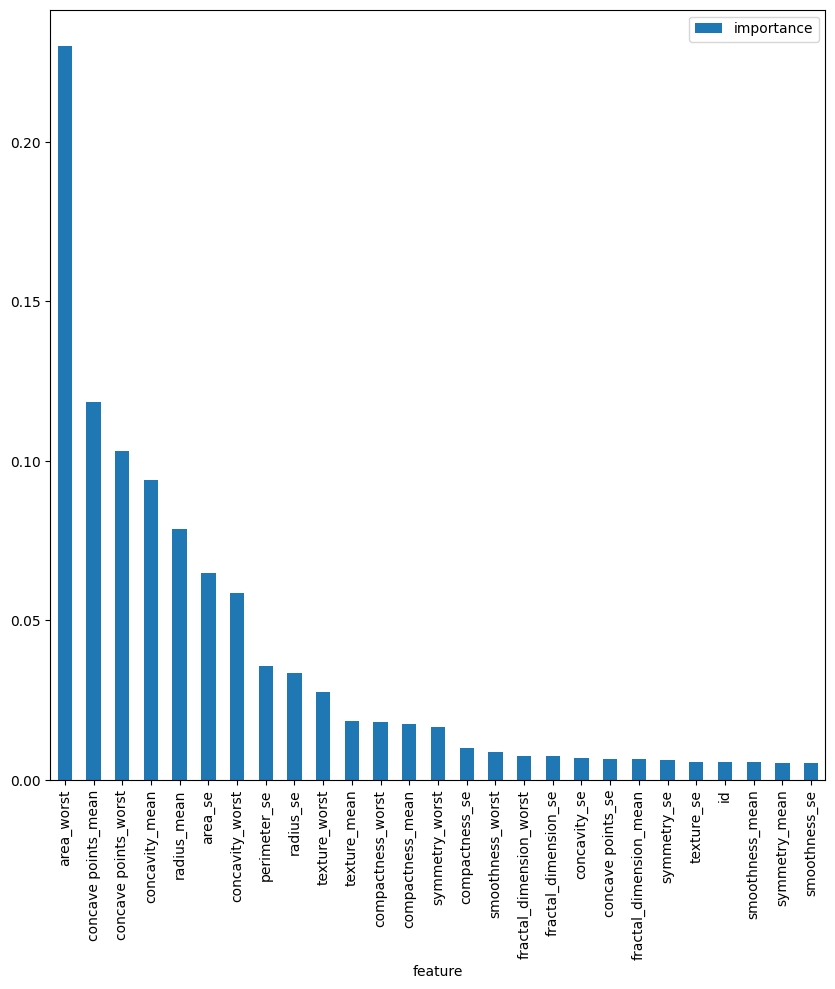

In [ ]:
rf_imp.sort_values('importance',ascending=False).plot(kind='bar',x='feature',y='importance',figsize=(10,10))